In [1]:
import pandas as pd
import numpy as np

In [2]:
DataSozluk = {"Ad": pd.Series(["Emirhan","Danko","Bedii","Ayşe","Fatma","Ali","Veli","Büşra","Mehmet","İrem","Onur","Can"]),
              "Meslek": pd.Series(["DevOps Engineer","Frontend Developer","Tasarımcı","Backend Developer","Frontend Developer","Tasarımcı","Backend Developer",None,None,None,"DevOps Engineer","Backend Developer"]),
              "Yaş": pd.Series([30,35,32,34,23,23,55,23,23,55,23,32]),
              "Maaş": pd.Series([27500,37500,22000,None,17000,16000,1500,18000,16000,None,35000,24000]),
              "Şehir": pd.Series(["Antalya","Ankara",None,None,None,None,None,"İzmir","Balıkesir","Kırıkkale",None,None])
}

In [3]:
df =pd.DataFrame(DataSozluk)

In [4]:
df.head()

,Ad,Meslek,Yaş,Maaş,Şehir
0,Emirhan,DevOps Engineer,30,27500.0,Antalya
1,Danko,Frontend Developer,35,37500.0,Ankara
2,Bedii,Tasarımcı,32,22000.0,None
3,Ayşe,Backend Developer,34,NaN,None
4,Fatma,Frontend Developer,23,17000.0,None


In [7]:
df.isnull().sum()/len(df)

Ad        0.000000
Meslek    0.250000
Yaş       0.000000
Maaş      0.166667
Şehir     0.583333
dtype: float64

In [8]:
df.isnull().sum().sum()

12

In [9]:
!pip install missingno

In [10]:
import missingno as msno

<AxesSubplot:>

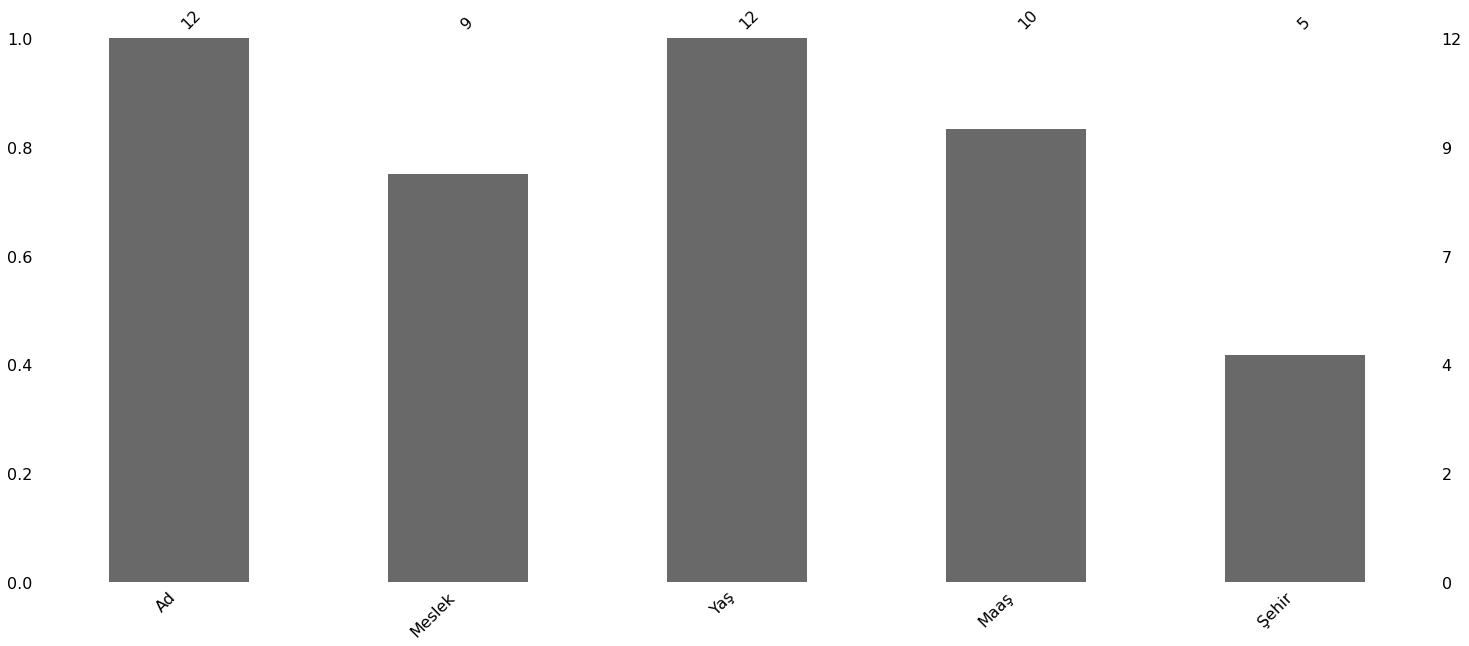

In [11]:
msno.bar(df)

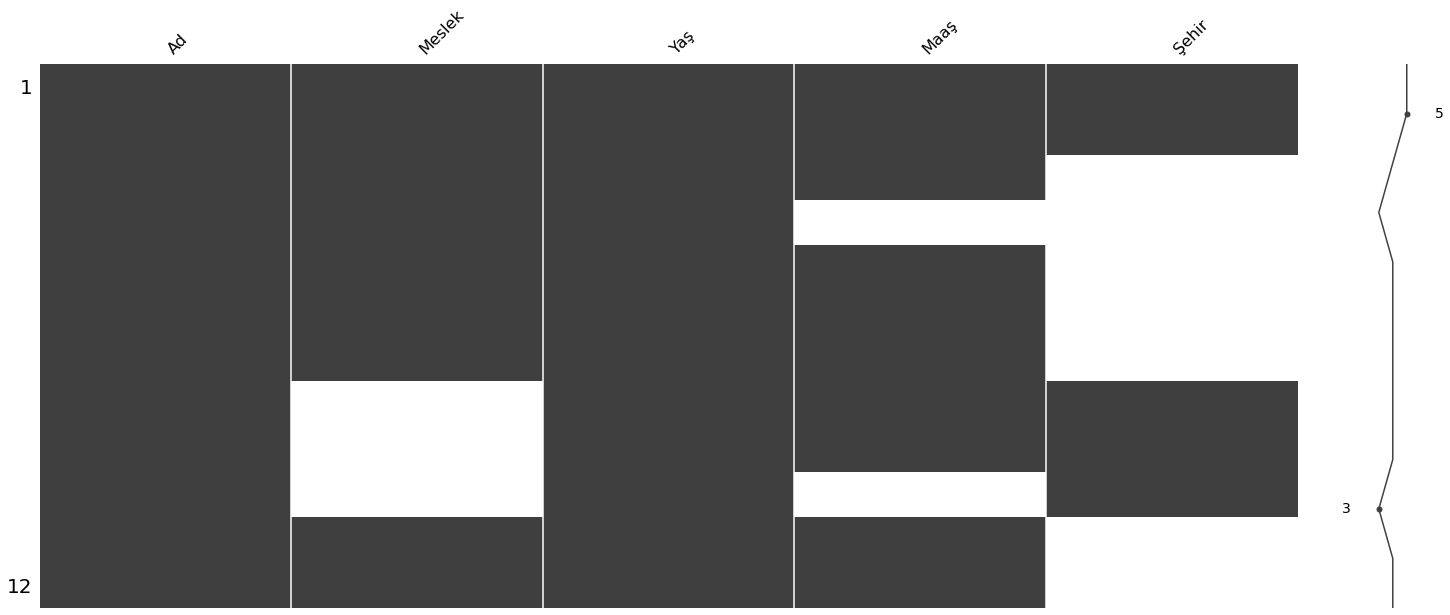

In [12]:
msno.matrix(df);

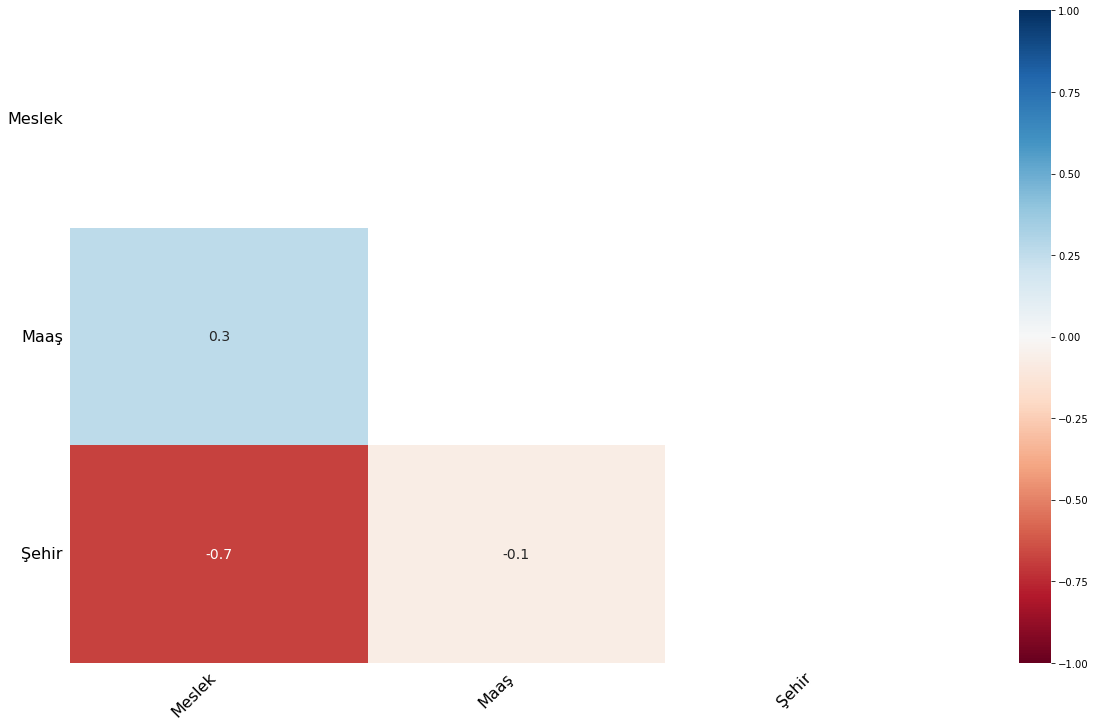

In [13]:
msno.heatmap(df);

In [14]:
def nandegerler(df):
  nandegerler = df.isnull.sum()/len(df) * 1000

In [15]:
nandegerler = len(df) * 0.5

In [16]:
nandegerler

6.0

In [17]:
df.dropna(thresh=nandegerler,axis=1)

,Ad,Meslek,Yaş,Maaş
0,Emirhan,DevOps Engineer,30,27500.0
1,Danko,Frontend Developer,35,37500.0
2,Bedii,Tasarımcı,32,22000.0
3,Ayşe,Backend Developer,34,NaN
4,Fatma,Frontend Developer,23,17000.0
5,Ali,Tasarımcı,23,16000.0
6,Veli,Backend Developer,55,1500.0
7,Büşra,None,23,18000.0
8,Mehmet,None,23,16000.0
9,İrem,None,55,NaN


In [18]:
df

,Ad,Meslek,Yaş,Maaş,Şehir
0,Emirhan,DevOps Engineer,30,27500.0,Antalya
1,Danko,Frontend Developer,35,37500.0,Ankara
2,Bedii,Tasarımcı,32,22000.0,None
3,Ayşe,Backend Developer,34,NaN,None
4,Fatma,Frontend Developer,23,17000.0,None
5,Ali,Tasarımcı,23,16000.0,None
6,Veli,Backend Developer,55,1500.0,None
7,Büşra,None,23,18000.0,İzmir
8,Mehmet,None,23,16000.0,Balıkesir
9,İrem,None,55,NaN,Kırıkkale


In [19]:
df.dropna(thresh=nandegerler,axis=1, inplace=True)

In [20]:
df

,Ad,Meslek,Yaş,Maaş
0,Emirhan,DevOps Engineer,30,27500.0
1,Danko,Frontend Developer,35,37500.0
2,Bedii,Tasarımcı,32,22000.0
3,Ayşe,Backend Developer,34,NaN
4,Fatma,Frontend Developer,23,17000.0
5,Ali,Tasarımcı,23,16000.0
6,Veli,Backend Developer,55,1500.0
7,Büşra,None,23,18000.0
8,Mehmet,None,23,16000.0
9,İrem,None,55,NaN


In [21]:
df["Meslek"] = df["Meslek"].fillna("Yazılımcı")

In [22]:
df

,Ad,Meslek,Yaş,Maaş
0,Emirhan,DevOps Engineer,30,27500.0
1,Danko,Frontend Developer,35,37500.0
2,Bedii,Tasarımcı,32,22000.0
3,Ayşe,Backend Developer,34,NaN
4,Fatma,Frontend Developer,23,17000.0
5,Ali,Tasarımcı,23,16000.0
6,Veli,Backend Developer,55,1500.0
7,Büşra,Yazılımcı,23,18000.0
8,Mehmet,Yazılımcı,23,16000.0
9,İrem,Yazılımcı,55,NaN


In [23]:
df["Maaş"].unique()

array([27500., 37500., 22000.,    nan, 17000., 16000.,  1500., 18000.,
       35000., 24000.])

In [25]:
meanMaas = df["Maaş"].mean()

In [26]:
df["Maaş"] = df["Maaş"].fillna(meanMaas)

In [27]:
df

,Ad,Meslek,Yaş,Maaş
0,Emirhan,DevOps Engineer,30,27500.0
1,Danko,Frontend Developer,35,37500.0
2,Bedii,Tasarımcı,32,22000.0
3,Ayşe,Backend Developer,34,21450.0
4,Fatma,Frontend Developer,23,17000.0
5,Ali,Tasarımcı,23,16000.0
6,Veli,Backend Developer,55,1500.0
7,Büşra,Yazılımcı,23,18000.0
8,Mehmet,Yazılımcı,23,16000.0
9,İrem,Yazılımcı,55,21450.0


In [28]:
def senior(maas):
  return maas > 25000

def mid(maas):
  return (maas>15000 and maas < 25000)

def jr(maas):
  return maas < 15000

In [29]:
df["Senior"] = df["Maaş"].apply(senior)
df["Mid"] = df["Maaş"].apply(mid)
df["jr"] = df["Maaş"].apply(jr)

In [30]:
df

,Ad,Meslek,Yaş,Maaş,Senior,Mid,jr
0,Emirhan,DevOps Engineer,30,27500.0,True,False,False
1,Danko,Frontend Developer,35,37500.0,True,False,False
2,Bedii,Tasarımcı,32,22000.0,False,True,False
3,Ayşe,Backend Developer,34,21450.0,False,True,False
4,Fatma,Frontend Developer,23,17000.0,False,True,False
5,Ali,Tasarımcı,23,16000.0,False,True,False
6,Veli,Backend Developer,55,1500.0,False,False,True
7,Büşra,Yazılımcı,23,18000.0,False,True,False
8,Mehmet,Yazılımcı,23,16000.0,False,True,False
9,İrem,Yazılımcı,55,21450.0,False,True,False


In [31]:
counter = 0

for i in df["Senior"]:
  if i == True:
    df["Senior"][counter] = 'Senior Dev'
  counter +=1

C:\Users\Hp\AppData\Local\Temp/ipykernel_7624/3060933726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Senior"][counter] = 'Senior Dev'
C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [32]:
df

,Ad,Meslek,Yaş,Maaş,Senior,Mid,jr
0,Emirhan,DevOps Engineer,30,27500.0,Senior Dev,False,False
1,Danko,Frontend Developer,35,37500.0,Senior Dev,False,False
2,Bedii,Tasarımcı,32,22000.0,False,True,False
3,Ayşe,Backend Developer,34,21450.0,False,True,False
4,Fatma,Frontend Developer,23,17000.0,False,True,False
5,Ali,Tasarımcı,23,16000.0,False,True,False
6,Veli,Backend Developer,55,1500.0,False,False,True
7,Büşra,Yazılımcı,23,18000.0,False,True,False
8,Mehmet,Yazılımcı,23,16000.0,False,True,False
9,İrem,Yazılımcı,55,21450.0,False,True,False


In [33]:
from sklearn import preprocessing

In [34]:
le = preprocessing.LabelEncoder()

In [35]:
df["Maaş_le"] = le.fit_transform(df["Maaş"])

In [36]:
df

,Ad,Meslek,Yaş,Maaş,Senior,Mid,jr,Maaş_le
0,Emirhan,DevOps Engineer,30,27500.0,Senior Dev,False,False,7
1,Danko,Frontend Developer,35,37500.0,Senior Dev,False,False,9
2,Bedii,Tasarımcı,32,22000.0,False,True,False,5
3,Ayşe,Backend Developer,34,21450.0,False,True,False,4
4,Fatma,Frontend Developer,23,17000.0,False,True,False,2
5,Ali,Tasarımcı,23,16000.0,False,True,False,1
6,Veli,Backend Developer,55,1500.0,False,False,True,0
7,Büşra,Yazılımcı,23,18000.0,False,True,False,3
8,Mehmet,Yazılımcı,23,16000.0,False,True,False,1
9,İrem,Yazılımcı,55,21450.0,False,True,False,4


In [37]:
ohe = preprocessing.OneHotEncoder()

In [38]:
df["Maaş"] = pd.Categorical(df["Maaş"])

In [39]:
dummiesMaas = pd.get_dummies(df["Maaş"],prefix="maas")

In [40]:
dummiesMaas

,maas_1500.0,maas_16000.0,maas_17000.0,maas_18000.0,maas_21450.0,maas_22000.0,maas_24000.0,maas_27500.0,maas_35000.0,maas_37500.0
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0


In [41]:
df["Mid"] = pd.Categorical(df["Mid"])

In [42]:
dummiesMid = pd.get_dummies(df["Mid"],prefix="mid")

In [43]:
dummiesMid

,mid_False,mid_True
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,0,1
8,0,1
9,0,1


In [44]:
df2 = pd.concat([dummiesMid, dummiesMaas], axis=1)
df2

,mid_False,mid_True,maas_1500.0,maas_16000.0,maas_17000.0,maas_18000.0,maas_21450.0,maas_22000.0,maas_24000.0,maas_27500.0,maas_35000.0,maas_37500.0
0,1,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,0,0
5,0,1,0,1,0,0,0,0,0,0,0,0
6,1,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,1,0,0,0,0,0,0
8,0,1,0,1,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,0,0


In [45]:
df = pd.concat([df, df2], axis=1)
df

,Ad,Meslek,Yaş,Maaş,Senior,Mid,jr,Maaş_le,mid_False,mid_True,maas_1500.0,maas_16000.0,maas_17000.0,maas_18000.0,maas_21450.0,maas_22000.0,maas_24000.0,maas_27500.0,maas_35000.0,maas_37500.0
0,Emirhan,DevOps Engineer,30,27500.0,Senior Dev,False,False,7,1,0,0,0,0,0,0,0,0,1,0,0
1,Danko,Frontend Developer,35,37500.0,Senior Dev,False,False,9,1,0,0,0,0,0,0,0,0,0,0,1
2,Bedii,Tasarımcı,32,22000.0,False,True,False,5,0,1,0,0,0,0,0,1,0,0,0,0
3,Ayşe,Backend Developer,34,21450.0,False,True,False,4,0,1,0,0,0,0,1,0,0,0,0,0
4,Fatma,Frontend Developer,23,17000.0,False,True,False,2,0,1,0,0,1,0,0,0,0,0,0,0
5,Ali,Tasarımcı,23,16000.0,False,True,False,1,0,1,0,1,0,0,0,0,0,0,0,0
6,Veli,Backend Developer,55,1500.0,False,False,True,0,1,0,1,0,0,0,0,0,0,0,0,0
7,Büşra,Yazılımcı,23,18000.0,False,True,False,3,0,1,0,0,0,1,0,0,0,0,0,0
8,Mehmet,Yazılımcı,23,16000.0,False,True,False,1,0,1,0,1,0,0,0,0,0,0,0,0
9,İrem,Yazılımcı,55,21450.0,False,True,False,4,0,1,0,0,0,0,1,0,0,0,0,0


In [46]:
x = df[["Maaş"]].astype(float)

In [47]:
min_max = preprocessing.MinMaxScaler()

In [48]:
x = min_max.fit_transform(x)

In [49]:
df["Maas_Scaled"] = pd.DataFrame(x)

In [50]:
df

,Ad,Meslek,Yaş,Maaş,Senior,Mid,jr,Maaş_le,mid_False,mid_True,...,maas_16000.0,maas_17000.0,maas_18000.0,maas_21450.0,maas_22000.0,maas_24000.0,maas_27500.0,maas_35000.0,maas_37500.0,Maas_Scaled
0,Emirhan,DevOps Engineer,30,27500.0,Senior Dev,False,False,7,1,0,...,0,0,0,0,0,0,1,0,0,0.722222
1,Danko,Frontend Developer,35,37500.0,Senior Dev,False,False,9,1,0,...,0,0,0,0,0,0,0,0,1,1.000000
2,Bedii,Tasarımcı,32,22000.0,False,True,False,5,0,1,...,0,0,0,0,1,0,0,0,0,0.569444
3,Ayşe,Backend Developer,34,21450.0,False,True,False,4,0,1,...,0,0,0,1,0,0,0,0,0,0.554167
4,Fatma,Frontend Developer,23,17000.0,False,True,False,2,0,1,...,0,1,0,0,0,0,0,0,0,0.430556
5,Ali,Tasarımcı,23,16000.0,False,True,False,1,0,1,...,1,0,0,0,0,0,0,0,0,0.402778
6,Veli,Backend Developer,55,1500.0,False,False,True,0,1,0,...,0,0,0,0,0,0,0,0,0,0.000000
7,Büşra,Yazılımcı,23,18000.0,False,True,False,3,0,1,...,0,0,1,0,0,0,0,0,0,0.458333
8,Mehmet,Yazılımcı,23,16000.0,False,True,False,1,0,1,...,1,0,0,0,0,0,0,0,0,0.402778
9,İrem,Yazılımcı,55,21450.0,False,True,False,4,0,1,...,0,0,0,1,0,0,0,0,0,0.554167


In [51]:
import seaborn as sns

In [52]:
x=df["Maaş"].astype(float)

<AxesSubplot:xlabel='Maaş'>

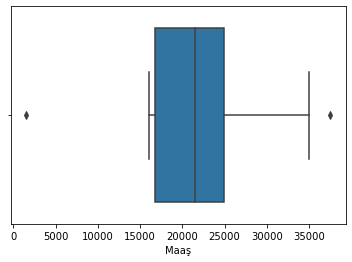

In [54]:
sns.boxplot(x=x)

In [55]:
Q1 = x.quantile(0.25)
Q3 = x.quantile(0.75)
IQR = Q3-Q1

In [56]:
Q1

16750.0

In [57]:
Q3

24875.0

In [58]:
IQR

8125.0

In [59]:
alt_sinir = Q1-1.5*IQR
ust_sinir = Q3+1.5*IQR

In [60]:
alt_sinir

4562.5

In [61]:
ust_sinir

37062.5

In [63]:
(x < alt_sinir) | (x> ust_sinir)

0     False
1      True
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
11    False
Name: Maaş, dtype: bool

In [64]:
aykiri = (x < alt_sinir)

In [65]:
aykiri.head()

0    False
1    False
2    False
3    False
4    False
Name: Maaş, dtype: bool

In [67]:
x[aykiri]

6    1500.0
Name: Maaş, dtype: float64

In [68]:
x[aykiri].index

Int64Index([6], dtype='int64')